In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

from ggplot import *
from scipy.stats import logistic
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import *
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
import graphviz
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVC, SVR
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [37]:
file1="c:/temp/svm_data1.csv"
data1=pd.read_csv(file1)
data1

,X1,X2,y
0,-0.486850,-0.621107,1
1,-1.476004,0.132181,1
2,-0.010911,2.037849,1
3,-0.013760,1.164893,1
4,0.515579,1.049514,1
5,-0.139122,0.329392,1
6,1.287317,0.728701,1
7,-0.587773,0.815217,1
8,-0.030600,0.882825,1
9,-2.196844,-0.021392,1


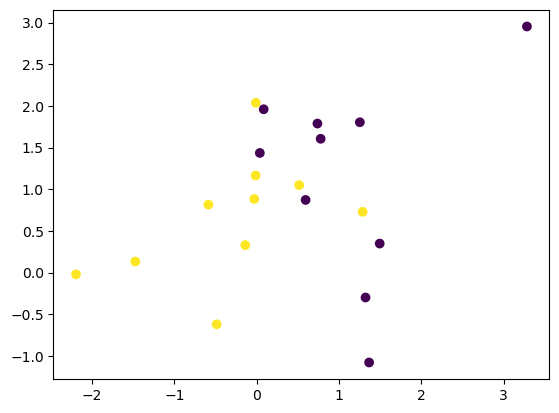

In [38]:
plt.scatter(data1['X1'],data1['X2'],c=data1['y'])
plt.show()

## non linear seperable 1) 슬랙활용

In [39]:
# non linearly seperable , 1) 슬랙 활용
# 슬랙 가중치 C=cost parameter

# svc1, C=0.1
X=data1[['X1','X2']]
y=data1['y']
svc1=SVC(C=0.1,kernel='linear',random_state=0)
result1=svc1.fit(X,y)
result1

SVC(C=0.1, kernel='linear', random_state=0)

In [40]:
# svc1, support vectors로 쓰인 18개 변수의 데이터 값
result1.support_vectors_

array([[ 0.08449906,  1.9599125 ],
       [ 0.77699828,  1.6054105 ],
       [ 1.4945496 ,  0.34788412],
       [ 0.73768926,  1.7883046 ],
       [ 1.3661239 , -1.0792539 ],
       [ 0.03753495,  1.4353855 ],
       [ 1.2532923 ,  1.8039327 ],
       [ 1.3223809 , -0.29942036],
       [ 0.59409535,  0.8716656 ],
       [-0.48685038, -0.62110734],
       [-1.4760038 ,  0.13218145],
       [-0.01091149,  2.0378487 ],
       [-0.01376025,  1.1648929 ],
       [ 0.51557881,  1.0495144 ],
       [-0.13912173,  0.32939234],
       [ 1.2873173 ,  0.72870135],
       [-0.58777297,  0.81521714],
       [-0.03060045,  0.88282478]])

In [41]:
# svc1, support vector 개수
result1.support_.size

18

In [42]:
# svc1, support vector로 쓰인 데이터
result1.support_ 

array([10, 11, 12, 13, 14, 15, 16, 18, 19,  0,  1,  2,  3,  4,  5,  6,  7,
        8])

In [43]:
# svc1, 예측 성과
pred1=result1.predict(X)
confusion_matrix(y,pred1)

array([[10,  0],
       [ 5,  5]], dtype=int64)

In [44]:
# svc1, CCR
(10+5)/(10+5+5)

0.75

In [45]:
# svc2, Large C -> tiny margin
svc2=SVC(C=1.0,kernel='linear',random_state=0)
result2=svc2.fit(X,y)
result2

SVC(kernel='linear', random_state=0)

In [46]:
# svc2, support vector 개수
result2.support_.size

12

In [47]:
# svc2, support vector로 쓰인 데이터
result2.support_ 

array([10, 11, 13, 14, 15, 19,  2,  3,  4,  5,  6,  8])

In [48]:
# svc2, support vectors로 쓰인 12개 변수의 데이터 값
result2.support_vectors_

array([[ 0.08449906,  1.9599125 ],
       [ 0.77699828,  1.6054105 ],
       [ 0.73768926,  1.7883046 ],
       [ 1.3661239 , -1.0792539 ],
       [ 0.03753495,  1.4353855 ],
       [ 0.59409535,  0.8716656 ],
       [-0.01091149,  2.0378487 ],
       [-0.01376025,  1.1648929 ],
       [ 0.51557881,  1.0495144 ],
       [-0.13912173,  0.32939234],
       [ 1.2873173 ,  0.72870135],
       [-0.03060045,  0.88282478]])

In [49]:
# svc2, 예측 성과
pred2=result2.predict(X)
confusion_matrix(y,pred2)

array([[8, 2],
       [2, 8]], dtype=int64)

In [50]:
# svc2, CCR
(8+8)/(8+8+2+2)

0.8

In [51]:
# svc3, small C(large margin), train test split
X=data1[['X1','X2']]
y=data1['y']
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=0)
svc3=SVC(C=0.1,kernel='linear',random_state=0)
result3=svc3.fit(X_train,y_train)
result3

SVC(C=0.1, kernel='linear', random_state=0)

In [52]:
# svc3, 서포트 벡터 개수
result3.support_.size

13

In [53]:
# svc3, 서포트 벡터 번호수
result3.support_

array([ 1,  5,  8,  9, 12, 13,  0,  2,  3,  4,  7, 10, 11])

In [54]:
# svc3, support vectors로 쓰인 12개의 데이터 값
result3.support_vectors_

array([[ 0.73768926,  1.7883046 ],
       [ 1.3661239 , -1.0792539 ],
       [ 1.2532923 ,  1.8039327 ],
       [ 0.77699828,  1.6054105 ],
       [ 0.03753495,  1.4353855 ],
       [ 1.4945496 ,  0.34788412],
       [ 1.2873173 ,  0.72870135],
       [ 0.51557881,  1.0495144 ],
       [-0.01091149,  2.0378487 ],
       [-0.13912173,  0.32939234],
       [-0.58777297,  0.81521714],
       [-0.01376025,  1.1648929 ],
       [-0.48685038, -0.62110734]])

In [55]:
# svc3 예측성과
pred3=result3.predict(X_test)
confusion_matrix(y_test,pred3)

array([[1, 3],
       [0, 2]], dtype=int64)

In [56]:
# svc3, CCR
(1+2)/(1+2+3)

0.5

## non linear seperable 2) kernel function

In [57]:
file2="c:/temp/svm_data1.csv"
data2=pd.read_csv(file2)
data2

,X1,X2,y
0,-0.486850,-0.621107,1
1,-1.476004,0.132181,1
2,-0.010911,2.037849,1
3,-0.013760,1.164893,1
4,0.515579,1.049514,1
5,-0.139122,0.329392,1
6,1.287317,0.728701,1
7,-0.587773,0.815217,1
8,-0.030600,0.882825,1
9,-2.196844,-0.021392,1


In [68]:
# svc4, kernel function=gaussian rbf, small C-> large margin
X=data1[['X1','X2']]
y=data1['y']
svc4=SVC(C=0.1,kernel='rbf',gamma='scale',random_state=0)
# gamma 지정 안했을 때, 자동으로 'scale' 사용됨
# gammma='auto' (x변수의 역수)로 지정할 수도 있음
result4=svc4.fit(X,y)
result4

SVC(C=0.1, random_state=0)

In [69]:
# svc4, 예측
pred4=result4.predict(X)
pred4

array([ 1,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1], dtype=int64)

In [60]:
pred3

array([ 1,  1,  1,  1,  1, -1], dtype=int64)

In [61]:
pred2

array([ 1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1, -1, -1, -1, -1,  1, -1,
       -1, -1, -1], dtype=int64)

In [62]:
pred1

array([ 1,  1, -1, -1, -1,  1, -1,  1, -1,  1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1], dtype=int64)

In [70]:
# svc4, 예측성과
confusion_matrix(y,pred4)

array([[10,  0],
       [ 3,  7]], dtype=int64)

In [71]:
# svc4, CCR
(10+7)/(10+7+3)

0.85

In [72]:
# svc5, kernel function=polynomial, small C-> large margin
X=data1[['X1','X2']]
y=data1['y']
svc5=SVC(C=0.1,kernel='poly',degree=3,random_state=0)
result5=svc5.fit(X,y)
pred5=result5.predict(X)
confusion_matrix(y,pred5)

array([[5, 5],
       [1, 9]], dtype=int64)

In [73]:
# svc4, CCR
(5+9)/(5+9+1+5)

0.7

# Lec 11 K-means Clustering
## unsupervised learning

- 군집화 해서 메일 보내자
- 공간상 어느 점을 선택하고, 그걸 k개 그룹으로 나누는 것
- 중심점으로부터 데이터 까지 거리 측정해서 그 평균을 계산해서 평균이 최소가 되는 상태가 optimal
- 중심점으로부터 데이터까지 거리=Euclidean distance=dissimilarity 비유사성

#### 최적 중심점 어케 찾을거임?
- 군집중심점이 4개인 경우, 고객 A와 4개의 중심점과의 ED를 모두 계산한다. 나머지 모든 고객에 대해서도 같은 방식으로 4개 중심점과의 ED를 계산한다. 
- 각 고객에 대해 최소 ED를 가진 중심점 cluster가 된다. 

#### K 얼마로 결정?
- elbow
- 평균 ED가 최소화 되도록 (각 점당 가장 가까운 중심점 까지의 거리=ED)
- WSS(=평균 거리 합) 최소화 되도록

In [75]:
file3="c:/temp/psysed.csv"
psysed=pd.read_csv(file3)
psysed

,id,flexibility,speed,strength
0,1,3.600000,6.11,2.07
1,2,1.120000,0.33,9.01
2,3,8.690000,8.90,3.83
3,4,2.670000,8.61,0.36
4,5,2.780000,1.69,8.64
...,...,...,...,...
75,76,2.440000,1.60,8.51
76,77,2.340000,1.66,8.91
77,78,5.080000,1.05,5.46
78,79,1.670000,0.87,8.70


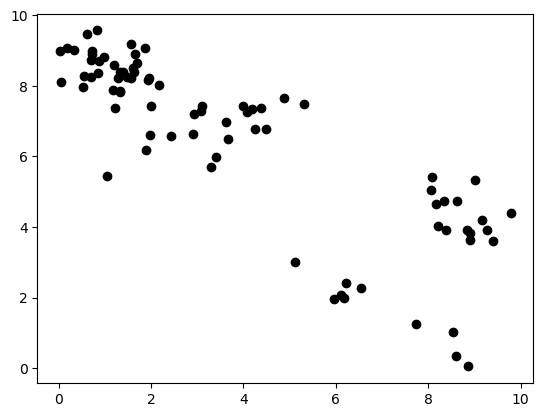

In [77]:
# k-means clustering ; flexibility, speed, strength 중에 두개만 써서 하자
# 우선 분포를 보자
plt.scatter(psysed['speed'],psysed['strength'],color='black')
plt.show()

In [85]:
# kmeans_3, k=3
X=psysed[['speed','strength']]
X_scaled=StandardScaler().fit_transform(X) # 표준화하기 : StandardSclaer

kmeans_3=KMeans(n_clusters=3,random_state=0,n_init=10,max_iter=300)
kmeans_3.fit(X,y)

KMeans(n_clusters=3, random_state=0)

In [87]:
# WSS, k=3, kemans_3 / 중심점이 3개일 때 평균길이 합의 최소
kmeans_3.inertia_

145.70898465322134

In [88]:
# 중심점의 위치, k=3, kemans_3
kmeans_3.cluster_centers_

array([[1.14485715, 8.47885705],
       [8.04119999, 3.27120002],
       [3.44850002, 6.83249999]])

In [89]:
# 각 데이터 값이 어느 클러스터에 들어가 있는 지, kmeans_3
kmeans_3.labels_

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 2, 0, 1, 1, 2, 2, 1, 1, 2, 2, 0, 0,
       0, 0, 1, 2, 2, 1, 1, 2, 2, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 2, 0, 2,
       0, 0, 0, 0, 1, 2, 1, 1, 2, 1, 0, 2, 2, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 2, 0, 2, 0, 2, 1, 0, 0, 2, 0, 1])

In [92]:
# 각 데이터가 들어간 클러스터 정보를 원 데이터에 넣자
df1=pd.DataFrame(kmeans_3.labels_,columns=['cluster_3'])

psysed_new=pd.concat([psysed,df1],axis=1)
psysed_new

,id,flexibility,speed,strength,cluster_3
0,1,3.600000,6.11,2.07,1
1,2,1.120000,0.33,9.01,0
2,3,8.690000,8.90,3.83,1
3,4,2.670000,8.61,0.36,1
4,5,2.780000,1.69,8.64,0
...,...,...,...,...,...
75,76,2.440000,1.60,8.51,0
76,77,2.340000,1.66,8.91,0
77,78,5.080000,1.05,5.46,2
78,79,1.670000,0.87,8.70,0


In [93]:
pd.value_counts(psysed_new['cluster_3'])

0    35
1    25
2    20
Name: cluster_3, dtype: int64

In [94]:
# 각 cluster의 x 값 평균
psysed_new.groupby('cluster_3')[['speed','strength']].mean()

,speed,strength
cluster_3,,
0,1.144857,8.478857
1,8.041200,3.271200
2,3.448500,6.832500


In [95]:
# k=4, kmeans_4
kmeans_4=KMeans(n_clusters=4, random_state=0,n_init=10,max_iter=300)
kmeans_4.fit(X,y)
# WSS, k=4, kemans_4 / 중심점이 4개일 때 평균길이 합의 최소
kmeans_4.inertia_

82.92927654836562

In [96]:
# k=5, kmeans_5
kmeans_5=KMeans(n_clusters=5, random_state=0,n_init=10,max_iter=300)
kmeans_5.fit(X,y)
# WSS, k=5, kemans_5 / 중심점이 5개일 때 평균길이 합의 최소
kmeans_5.inertia_

62.555902924982604

In [97]:
# WSS, k=3, kemans_3 / 중심점이 3개일 때 평균길이 합의 최소
kmeans_3.inertia_

145.70898465322134

In [98]:
# elbow : 확 작아지고 그 다음 부터 안작아지면 그때가 'k'